# 特征不稳定性分析

In [1]:
import glob, os
import itertools

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'
folder_outdoor = 'D:\\Atom\\python\\data\\cleaned\\grill\\outdoor'

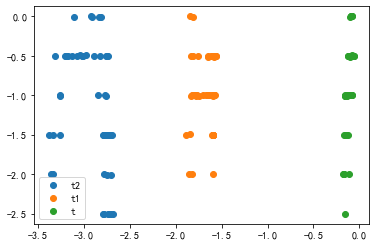

In [2]:
p_f = pd.read_csv(os.path.join(folder_clean, 'd10_water_f_kde.csv'))
p_t2 = pd.read_csv(os.path.join(folder_clean, 'd10_water_t2_kde.csv'))
p_t1 = pd.read_csv(os.path.join(folder_clean, 'd10_water_t1_kde.csv'))
p_t = pd.read_csv(os.path.join(folder_clean, 'd10_water_t_kde.csv'))

plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t2['PHASE']), p_f['RSSI'] - p_t2['RSSI'])
plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t1['PHASE']), p_f['RSSI'] - p_t1['RSSI'])
plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t['PHASE']), p_f['RSSI'] - p_t['RSSI'])

plt.legend(['t2', 't1', 't', '6'])

(-1.0, 4.0)

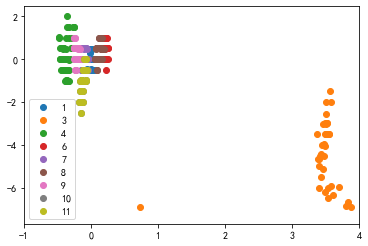

In [7]:
ds = [1, 3, 4, 6, 7, 8, 9, 10, 11]
for d in ds:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_water_f_kde.csv' % d))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_water_t_kde.csv' % d))
    plt.scatter(np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE']), df_h['RSSI'] - df_t['RSSI'])
plt.legend(ds)
plt.xlim([-1, 4])

(-7.0, 1.0)

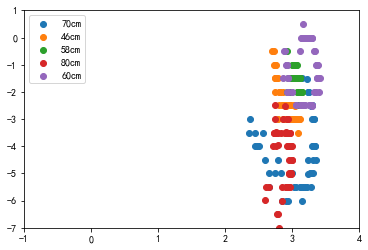

In [11]:
# ds = [1, 4, 6, 7, 8, 9, 11]
# labels = ['70cm', '桌子上轴心旋转', '46cm', '58cm', '80cm', '实验室', '60cm']
ds = [1, 6, 7, 8, 11]
labels = ['70cm', '46cm', '58cm', '80cm', '60cm']
for d in ds:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_oil_f_kde.csv' % d))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_oil_t_kde.csv' % d))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
    phase_diff[phase_diff < 0] += 2*np.pi
    plt.scatter(phase_diff, df_h['RSSI'] - df_t['RSSI'])
plt.legend(labels)
plt.xlim([-1, 4])
plt.ylim([-7, 1])

(-7.0, 1.0)

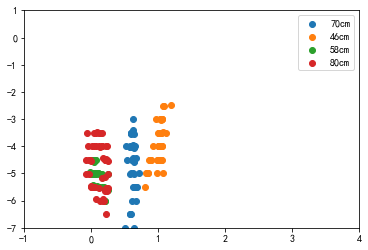

In [10]:
# ds = [1, 3, 4, 6, 7, 8, 9]
# labels = ['70cm', '桌子上', '桌子上轴心旋转', '46cm', '58cm', '80cm', '实验室']
ds = [1, 6, 7, 8]
labels = ['70cm', '46cm', '58cm', '80cm']
for d in ds:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_vinegar_f_kde.csv' % d))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_vinegar_t_kde.csv' % d))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
#     phase_diff[phase_diff < 0] += 2*np.pi
    plt.scatter(phase_diff, df_h['RSSI'] - df_t['RSSI'])
plt.legend(labels)
plt.xlim([-1, 4])
plt.ylim([-7, 1])

(-7.0, 1.0)

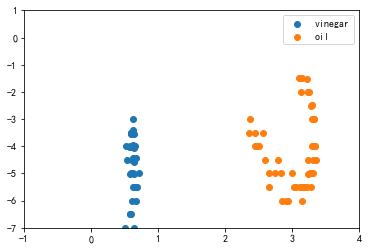

In [17]:
# ds = [1, 3, 4, 6, 7, 8, 9]
# labels = ['70cm', '桌子上', '桌子上轴心旋转', '46cm', '58cm', '80cm', '实验室']
ds = [1, 6, 7, 8]
labels = ['70cm', '46cm', '58cm', '80cm']

d = 1
df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_vinegar_f_kde.csv' % d))
df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_vinegar_t_kde.csv' % d))
phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
#     phase_diff[phase_diff < 0] += 2*np.pi
plt.scatter(phase_diff, df_h['RSSI'] - df_t['RSSI'])

df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_oil_f_kde.csv' % d))
df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_oil_t_kde.csv' % d))
phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
phase_diff[phase_diff < 0] += 2*np.pi
plt.scatter(phase_diff, df_h['RSSI'] - df_t['RSSI'])
    
plt.legend(['vinegar', 'oil'])
plt.xlim([-1, 4])
plt.ylim([-7, 1])

## d9实验室和d4桌子上，瓶子都是摆在桌子上，特征是否相似
d7是正常悬空放。

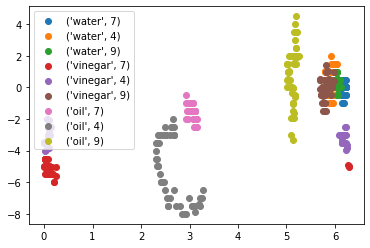

In [10]:
matls = ['water', 'vinegar', 'oil']
ds = [7, 4, 9]
for matl in matls:
    for d in ds:     
        p_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
        p_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))
        phase_diff = np.unwrap(p_f['PHASE']) - np.unwrap(p_t['PHASE'])
        phase_diff[phase_diff < 0] += 2*np.pi
        plt.scatter(phase_diff, p_f['RSSI'] - p_t['RSSI'])
plt.legend(list(itertools.product(matls, ds))) 

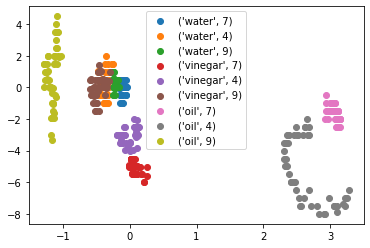

In [19]:
matls = ['water', 'vinegar', 'oil']
ds = [7, 4, 9]
for matl in matls:
    for d in ds:     
        p_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
        p_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))
        phase_diff = np.unwrap(p_f['PHASE']) - np.unwrap(p_t['PHASE'])
        plt.scatter(phase_diff, p_f['RSSI'] - p_t['RSSI'])
plt.legend(list(itertools.product(matls, ds))) 

对水来说，的确相似，水的特征总是这么好，在什么情况下都很相似，油和醋在两个环境下并不存在相似性，lab的空瓶没有采数据

## 是否距离越近，特征簇的半径越小？

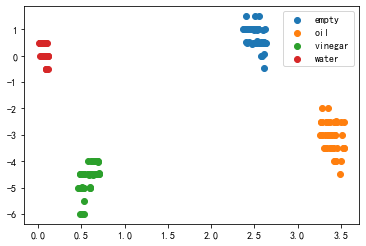

In [13]:
matls = ['empty', 'oil', 'vinegar', 'water']
data = {}
for matl in matls:
    df_h = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_front_kde_outdoor.csv' % matl))
    df_t = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_tail_kde_outdoor.csv' % matl))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
    phase_diff[phase_diff < 0] += 2*np.pi
    rssi_diff = df_h['RSSI'].values - df_t['RSSI'].values
    plt.scatter(phase_diff, rssi_diff)
    data[matl] = [phase_diff, rssi_diff]
plt.legend(matls)

import pickle
file = open('features.txt', 'wb')
pickle.dump(data, file)
file.close()


{'empty': [array([2.4681828 , 2.50546084, 2.51131926, 2.53441377, 2.57665605,
         2.59238128, 2.6119299 , 2.63428439, 2.62065586, 2.61812749,
         2.60995654, 2.56817676, 2.60486896, 2.54350973, 2.55393155,
         2.49904741, 2.49876991, 2.50370332, 2.4323231 , 2.44043239,
         2.39751176, 2.45797681, 2.47989963, 2.41869457, 2.52824701,
         2.5318854 , 2.61075822, 2.57206182, 2.61242324, 2.62151921,
         2.60351228, 2.59469381, 2.56493921, 2.54193721, 2.53506128,
         2.53811382, 2.56241084, 2.53718881, 2.47755627, 2.43463564,
         2.40148932, 2.42927056, 2.37682229, 2.39923845, 2.36627714,
         2.49651904, 2.40352435, 2.44197408, 2.4434541 , 2.42964057]),
  array([ 0.46231156,  0.5       ,  0.5       ,  0.49748744,  0.        ,
          0.00251256,  0.05527638,  0.49748744,  0.5       ,  0.48241206,
         -0.44974874,  0.49748744,  0.99497487,  1.00753769,  1.5       ,
          1.        ,  0.99497487,  1.49748744,  1.00251256,  1.00502513,
   

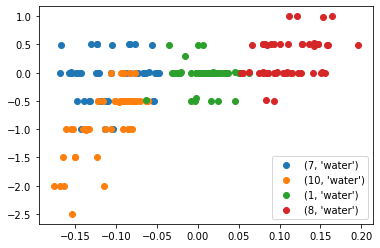

In [27]:
ds = [7, 10, 1, 8]
# matls = ['empty', 'oil', 'vinegar', 'water']
matl = 'water'
for d in ds:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
#         phase_diff[phase_diff < 0] += 2*np.pi
    plt.scatter(phase_diff, df_h['RSSI'] - df_t['RSSI'])
plt.legend(list(itertools.product(ds, matls)))

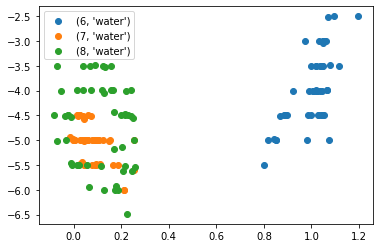

In [33]:
ds = [6, 7, 8]
# matls = ['empty', 'oil', 'vinegar', 'water']
matl = 'vinegar'
for d in ds:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
#     phase_diff[phase_diff < 0] += 2*np.pi
    plt.scatter(phase_diff, df_h['RSSI'] - df_t['RSSI'])
plt.legend(list(itertools.product(ds, matls)))

不存在距离越近，半径越小的特征，簇是在偏移，而非缩放

## 频率响应形状是否相似

是


### 相位差的频率响应

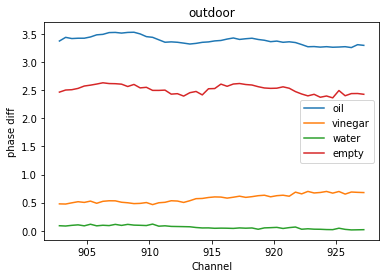

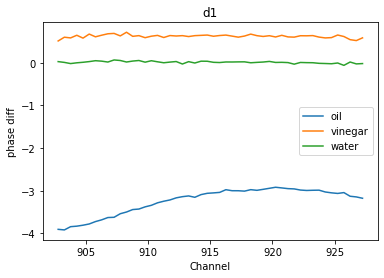

In [20]:
matls = ['oil', 'vinegar', 'water', 'empty']

plt.figure(1)
for matl in matls:
    df_h = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_front_kde_outdoor.csv' % matl))
    df_t = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_tail_kde_outdoor.csv' % matl))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
    phase_diff[phase_diff < 0] += 2 * np.pi
    plt.plot(df_h['CHANNEL'], phase_diff)
plt.xlabel('Channel')
plt.ylabel('phase diff')
plt.title('outdoor')
plt.legend(matls)

plt.figure(2)
for matl in ['oil', 'vinegar', 'water']:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (1, matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (1, matl)))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
#     phase_diff[phase_diff < 0] += 2 * np.pi
    plt.plot(df_h['CHANNEL'], phase_diff)
plt.xlabel('Channel')
plt.ylabel('phase diff')
plt.title('d1')
plt.legend(matls)

### RSSI差的频率响应

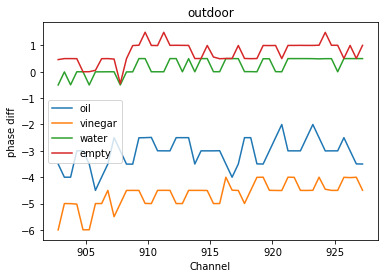

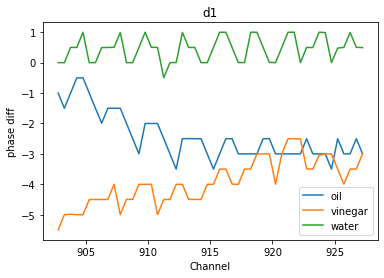

In [26]:
matls = ['oil', 'vinegar', 'water', 'empty']
plt.figure(1)
for matl in matls:
    df_h = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_front_kde_outdoor.csv' % matl))
    df_t = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_tail_kde_outdoor.csv' % matl))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
    phase_diff[phase_diff < 0] += 2 * np.pi
    plt.plot(df_h['CHANNEL'], df_h['RSSI'] - df_t['RSSI'])
plt.xlabel('Channel')
plt.ylabel('phase diff')
plt.title('outdoor')
plt.legend(matls)

plt.figure(2)
for matl in ['oil', 'vinegar', 'water']:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (6, matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (6, matl)))
    plt.plot(df_h['CHANNEL'], df_h['RSSI'] - df_t['RSSI'])
plt.xlabel('Channel')
plt.ylabel('phase diff')
plt.title('d1')
plt.legend(matls)

### 频率响应的波动是哪来的？

Text(0, 0.5, 'RSSI DIFF')

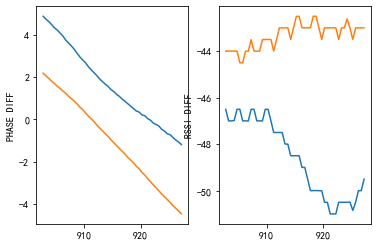

In [4]:
# ds = [1, 4, 6, 7, 8, 9, 11]
d = 4
matl = 'oil'

df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))

plt.subplot(121)
plt.plot(df_h['CHANNEL'], np.unwrap(df_h['PHASE']))
plt.plot(df_t['CHANNEL'], np.unwrap(df_t['PHASE']))
phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
phase_diff[phase_diff < 0] += 2 * np.pi
# plt.plot(df_h['CHANNEL'], phase_diff)
plt.ylabel('PHASE DIFF')


plt.subplot(122)
plt.plot(df_h['CHANNEL'], df_h['RSSI'])
plt.plot(df_t['CHANNEL'], df_t['RSSI'])
# plt.plot(df_h['CHANNEL'], df_h['RSSI'] - df_t['RSSI'])
plt.ylabel('RSSI DIFF')

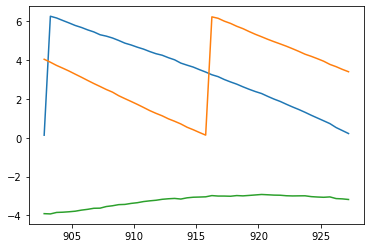

In [42]:
d = 1
matl = 'oil'

df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))


plt.plot(df_h['CHANNEL'], df_h['PHASE'])
plt.plot(df_t['CHANNEL'], df_t['PHASE'])

plt.plot(df_t['CHANNEL'], np.unwrap(df_h['PHASE'] - df_t['PHASE']))


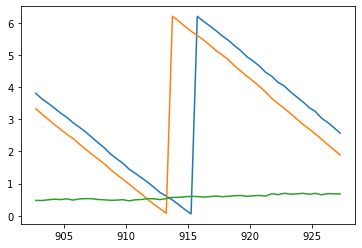

In [46]:
d = 1
matl = 'vinegar'

df_h = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_front_kde_outdoor.csv' % matl))
df_t = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_tail_kde_outdoor.csv' % matl))


plt.plot(df_h['CHANNEL'], df_h['PHASE'])
plt.plot(df_t['CHANNEL'], df_t['PHASE'])

plt.plot(df_t['CHANNEL'], np.unwrap(df_h['PHASE'] - df_t['PHASE']))

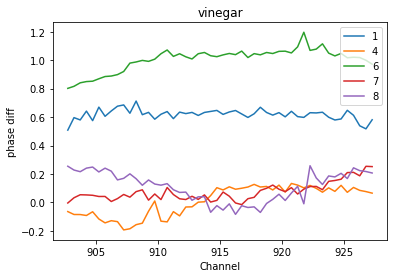

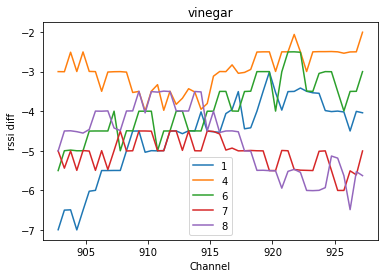

In [17]:
ds = [1, 4, 6, 7, 8]
matl = 'vinegar'

plt.figure(1)
for d in ds:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
#     phase_diff[phase_diff < 0] += 2 * np.pi
    plt.plot(df_h['CHANNEL'], phase_diff)
plt.xlabel('Channel')
plt.ylabel('phase diff')
plt.title(matl)
plt.legend(ds)

plt.figure(2)
for d in ds:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))
    plt.plot(df_h['CHANNEL'], df_h['RSSI'] - df_t['RSSI'])
plt.xlabel('Channel')
plt.ylabel('rssi diff')
plt.title(matl)
plt.legend(ds)

### 室外的数据都好吗？

In [20]:
import os
folder_outdoor_grill = 'D:\\Atom\\python\\data\\cleaned\\outdoor\\front-tail'
df = pd.read_csv(os.path.join(folder_outdoor_grill, 'outdoor_all_f_empty_aligned.csv'))

In [23]:
df['DISTANCE'].unique()

array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120.])